# Lab | Matplotlib & Seaborn (Challenge 3)

#### Import all the libraries that are necessary.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Challenge 3

#### Open the titanic file. Name your dataset titanic.

Load the dataset from the `data` folder

In [2]:
# Read the data
titanic = pd.read_csv('data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [3]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
Hint: Use Pandas select_dtypes

In [4]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
5,6,0.0,3,"Moran, Mr. James",male,23.926502,0,0,330877,8.4583,U0,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,U0,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,U0,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,U0,C


In [5]:
# Numerical variables
print("floats: ", titanic.select_dtypes(["float64"]).columns)
print("ints: ", titanic.select_dtypes(["int64"]).columns)                                            
print("objects: ", titanic.select_dtypes(["object"]).columns)

print("\ncategorical: survived, Pclass, gender, parch(?), cabin, embarked")
print("numerical: passengerID, age, SibSps")
print("other: name, ticket")


floats:  Index(['Survived', 'Age', 'Fare'], dtype='object')
ints:  Index(['PassengerId', 'Pclass', 'SibSp', 'Parch'], dtype='object')
objects:  Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

categorical: survived, Pclass, gender, parch(?), cabin, embarked
numerical: passengerID, age, SibSps
other: name, ticket


In [6]:
# Categorical variables
#see above

#### Set the plot style to classic and the figure size to (12,6).
Hint: To set the style you can use matplotlib.pyplot functions or seaborn 

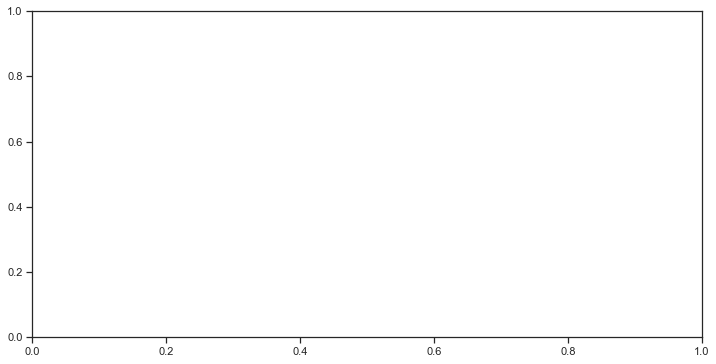

In [7]:
# Plot style change
#there is no classic style in sns: style must be one of white, dark, whitegrid, darkgrid, ticks
sns.set(style = "ticks") 


# Figure size change
fig, ax = plt.subplots(figsize=(12,6))

#### Use the right visulalization to show the distribution of the column Age.

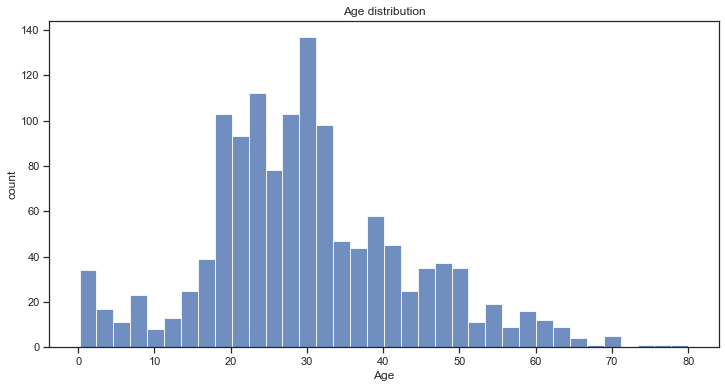

In [8]:
# Pandas plots are based on matplotlib
# Plot the histogram of column Age

bin_nr = int(np.sqrt(titanic["Age"].count()))

fig, ax = plt.subplots(figsize=(12,6))
titanic["Age"].plot(kind = 'hist', color = 'b', alpha = 0.8, bins=bin_nr)

# Set titles, labels, etc
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("count")


# Show the plot
plt.show()

#### Use subplots and plot the distribution of the Age variable with bins equal to 10, 20 and 50.

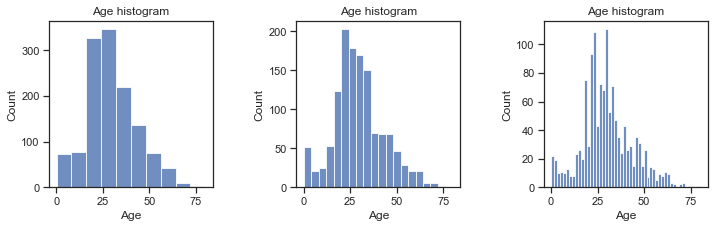

In [9]:
# Variables
age = titanic["Age"]
bin_size = [10, 20, 50]

# Create a figure of a fixed size and axes
fig, ax = plt.subplots(1,3, figsize=(10,3))
fig.tight_layout(w_pad=4)

# Plot the histogram using a different number of bins
for i in range(3):
    plt.sca(ax[i])
    age.plot(kind = 'hist', color = 'b', alpha = 0.8, bins=bin_size[i])
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.title("Age histogram")

plt.show();

#### How does the bin size affect your plot? Comment.

~~~~
Using a low number of bins (wider bins) reduces noise on the distribution estimation while using a 
high number of bins (narrower bins) gives greater precision to the distribution estimation (and more noise). 
~~~~

To which I would add that noise can also be information (it seems like newborns were more often brought than eg 10yr-olds). that could potentially be interesting. 

#### Use seaborn to show the distribution of the column Age.

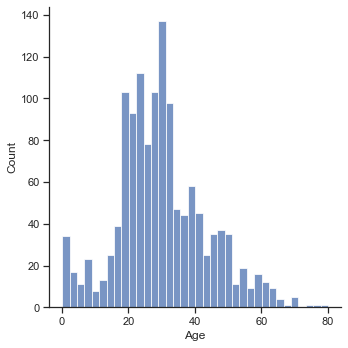

In [10]:
# Seaborn is a Python library based on matplotlib
# Plot of the age histogram using seaborn
sns.displot(age, bins=bin_nr)

# Show the plot
plt.show()

#### Use the right plot to visualize the column Gender. There are 2 ways of doing it. Do it both ways.
Hint: Use matplotlib and seaborn

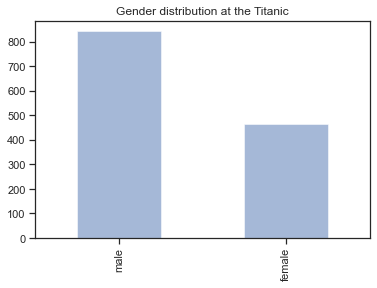

In [11]:
# OPTION 1 - Matplotlib

# Bar plot of the gender
gender = titanic["Gender"].value_counts()

# Add labels to the plot and change xticks rotation
gender.plot(kind = 'bar', color = 'b', alpha = 0.5)
plt.title("Gender distribution at the Titanic")

# Show the plot
plt.show();

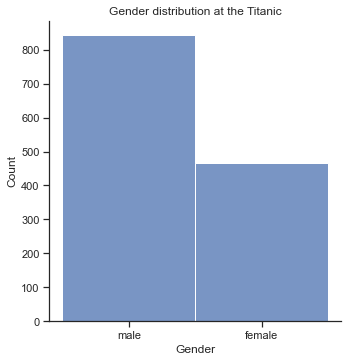

In [12]:
# OPTION 2 - Seaborn

# Seaborn Countplot
sns.displot(titanic["Gender"])
plt.title("Gender distribution at the Titanic")

# Show the plot
plt.show();

#### Use the right plot to visualize the column Pclass.

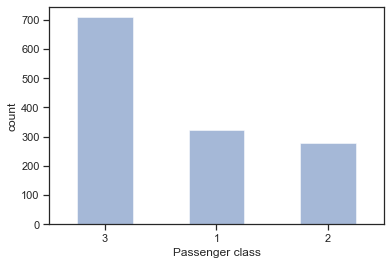

In [13]:
# Bar plot of Pclass
Pclass = titanic["Pclass"].value_counts()

Pclass.plot(kind = "bar", color = "b", alpha = 0.5)

# Add labels to the plot and change xticks rotation
plt.xlabel("Passenger class")
plt.ylabel("count")
plt.xticks(rotation = 0)

# Show the plot
plt.show();

#### We would like to have in one single plot the summary statistics of the feature Age. What kind of plot would you use?

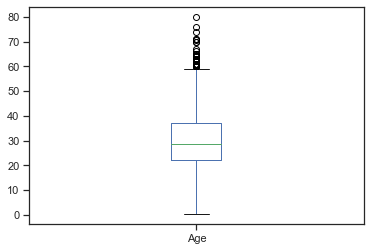

In [14]:
# Box plot
titanic["Age"].plot(kind = "box")

# Show the plot
plt.show()

#### What does the last plot tells you about the feature Age? Comment.

~~~~
The statistics that you can get from the boxplot are the minimum, first quartile, median, 
third quartile, and maximum.

The red line shows us the median of Age. 
The blue box shows us the interquartile range (from Q1 to Q3).
It also shows us the outliers, which are out of the maximum and minimum range (Q1 - 1.5*IQR, Q3 + 1.5*IQR).
~~~~

#### Now in addition to the summary statistics, we want to have in the SAME plot the distribution of Age. What kind of plot would you use?

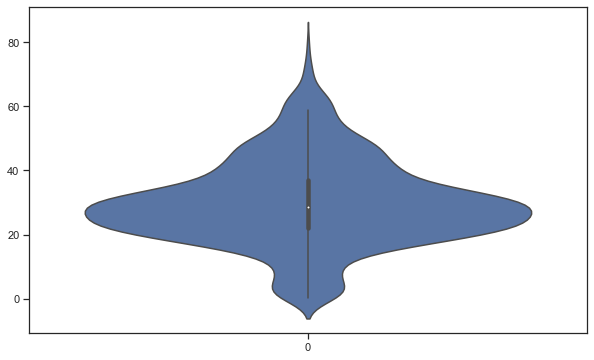

In [15]:
# Set figure size
plt.subplots(figsize=(10,6))

# Violin plot
sns.violinplot(data = titanic["Age"])

# Show the plot
plt.show()

#### What additional information the last plot provides you about the feature Age? Comment.

~~~~
This plot is a combination of a boxplot and a density plot. The violin plot features a kernel density estimation 
of the underlying distribution of the data.

The black central part of the plot is the same as a boxplot and the white dot is the median.
The blue part is the distribution of the data.
~~~~

#distribution: the percentage of data that has a certain value

#### We suspect that there is a linear relationship between Fare and Age. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
Hint: One of the ways involves using Seaborn.

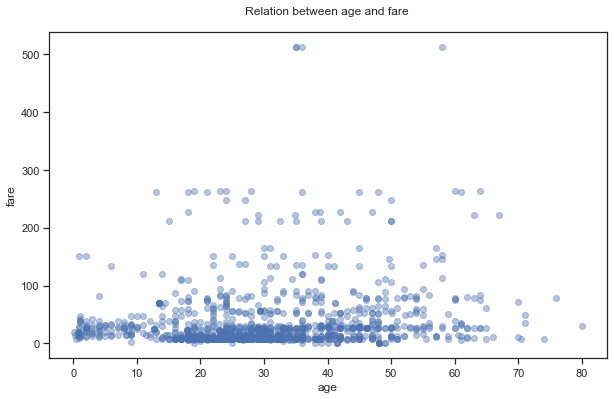

In [16]:
# OPTION 1

# Scatter plot
plt.subplots(figsize=(10,6))
plt.scatter(titanic["Age"], titanic["Fare"], color = 'b', alpha = 0.4)


# Add labels
plt.xlabel("age")
plt.ylabel("fare")
plt.title("Relation between age and fare \n")

# Show the plot
plt.show();

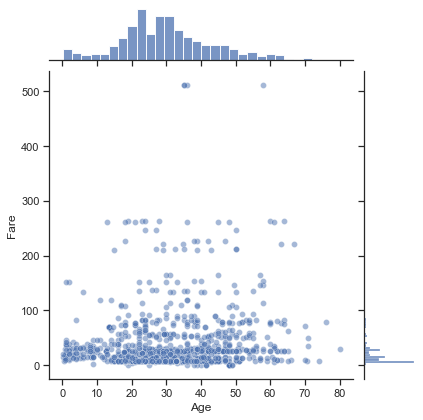

In [17]:
# OPTION 2

# Joinplot
sns.jointplot(data = titanic, x = "Age", y= "Fare", color = 'b', alpha = 0.5)
# plt.title("Relation between age and fare \n")

# Show the plot
plt.show()

#### Using Seaborn plot the correlation matrix.

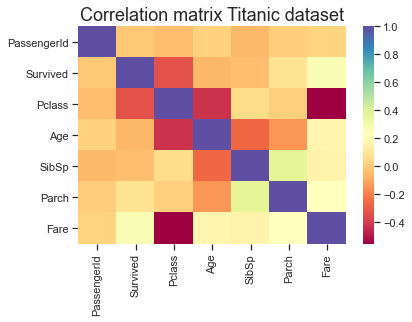

In [18]:
# Set figure size
#plt.subplots(figsize=(10,6))

# Correlation matrix
sns.heatmap(titanic.corr(), cmap='Spectral')

# Add title
plt.title("Correlation matrix Titanic dataset", fontsize=18)

# Show plot
plt.show();

#### What are the most correlated features? Comment.

~~~~~
The most correlated features are Parch and SibSp.
~~~~~

I dont agree. I think Pclass&fare and Pclass&age are darker. (survived & Pclass is - I think - close to Parch and SibSp too)

#### Use the right plot to display the summary statistics of the Age in function of the Pclass.

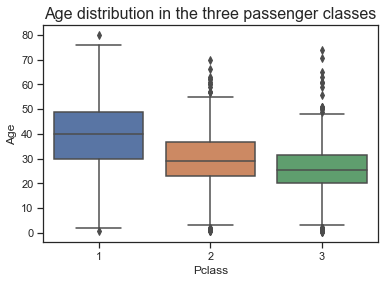

In [19]:
# Boxplot
sns.boxplot(x=titanic["Pclass"], y=titanic["Age"], data=titanic)
plt.title("Age distribution in the three passenger classes", fontsize = 16)
# Show the plot
plt.show();

#### Use the seaborn to plot the distribution of the Age based on the Gender.
Hint: Use Facetgrid

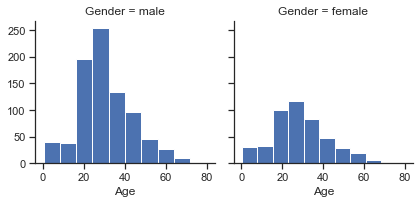

In [20]:
# Create a grid with FacetGrid
sns.FacetGrid(data=titanic, col="Gender").map(plt.hist,"Age")

# Draw a plot on each facet


# Show the plot
plt.show();
